In [1]:
%pip install polars

  Using cached polars-1.38.0-py3-none-any.whl.metadata (10 kB)
  Using cached polars_runtime_32-1.38.0-cp310-abi3-win_amd64.whl.metadata (1.5 kB)
Using cached polars-1.38.0-py3-none-any.whl (810 kB)
Using cached polars_runtime_32-1.38.0-cp310-abi3-win_amd64.whl (45.7 MB)

   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   -------------------- ------------------- 1/2 [polars]
   -------------------- ------------------- 1/2 [polars]
   -------------------- ------------------- 1/2 [polars]
   -------------------- ------------------- 1/2 [polars]
   -------------------- ------------------- 1/2 [polars]
   -------------------- ----------

In [1]:
## STEP 1A — Load and Clean Data

import polars as pl

# Load your reviews dataset
df = pl.read_csv(r"E:\__PROJECTS__\genai-multi-agent-project\data\raw\reviews.csv")

# Clean core columns
reviews_df = df.select(
    [pl.col("review_topic"), pl.col("review"), pl.col("score")]
).filter(pl.col("review").is_not_null())

print("Shape:", reviews_df.shape)
print(reviews_df.head())

Shape: (2438577, 3)
shape: (5, 3)
┌──────────────┬─────────────────────────────────┬───────┐
│ review_topic ┆ review                          ┆ score │
│ ---          ┆ ---                             ┆ ---   │
│ str          ┆ str                             ┆ f64   │
╞══════════════╪═════════════════════════════════╪═══════╡
│ ComputerGame ┆ Best 👌 mobile game ever        ┆ 5.0   │
│ ComputerGame ┆ It's a really good game I'm go… ┆ 5.0   │
│ ComputerGame ┆ Call of duty mobile is a very … ┆ 5.0   │
│ ComputerGame ┆ I love the game in it's entire… ┆ 3.0   │
│ ComputerGame ┆ Unplayable size.... its portab… ┆ 1.0   │
└──────────────┴─────────────────────────────────┴───────┘


In [2]:
## STEP 1B — Create Insight Aggregate

topic_score_summary = (
    reviews_df
    .group_by(["review_topic", "score"])
    .count()
    .sort(["review_topic", "score"])
)

print(topic_score_summary)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\1500942546.py:6: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


shape: (30, 3)
┌──────────────┬───────┬────────┐
│ review_topic ┆ score ┆ count  │
│ ---          ┆ ---   ┆ ---    │
│ str          ┆ f64   ┆ u32    │
╞══════════════╪═══════╪════════╡
│ ComputerGame ┆ 1.0   ┆ 11619  │
│ ComputerGame ┆ 2.0   ┆ 1000   │
│ ComputerGame ┆ 3.0   ┆ 4500   │
│ ComputerGame ┆ 4.0   ┆ 2946   │
│ ComputerGame ┆ 5.0   ┆ 29935  │
│ …            ┆ …     ┆ …      │
│ Products     ┆ 1.0   ┆ 18294  │
│ Products     ┆ 2.0   ┆ 5451   │
│ Products     ┆ 3.0   ┆ 14024  │
│ Products     ┆ 4.0   ┆ 36969  │
│ Products     ┆ 5.0   ┆ 105647 │
└──────────────┴───────┴────────┘


In [3]:
## STEP 1B — Define Business-Friendly Sentiment Buckets
reviews_analytics = reviews_df.with_columns(
    pl.when(pl.col("score") <= 2)
    .then(pl.lit("Negative"))
    .when(pl.col("score") == 3)
    .then(pl.lit("Neutral"))
    .otherwise(pl.lit("Positive"))
    .alias("sentiment_bucket")
)

reviews_analytics.select(["review_topic", "score", "sentiment_bucket"]).head()

review_topic,score,sentiment_bucket
str,f64,str
"""ComputerGame""",5.0,"""Positive"""
"""ComputerGame""",5.0,"""Positive"""
"""ComputerGame""",5.0,"""Positive"""
"""ComputerGame""",3.0,"""Neutral"""
"""ComputerGame""",1.0,"""Negative"""


In [4]:
reviews_analytics.group_by("sentiment_bucket").count()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\721055097.py:1: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  reviews_analytics.group_by("sentiment_bucket").count()


sentiment_bucket,count
str,u32
"""Neutral""",118957
"""Positive""",2160006
"""Negative""",159614


In [7]:
%pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.9 MB/s et

C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\1258491457.py:7: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  reviews_analytics.group_by("sentiment_bucket").count().sort("sentiment_bucket")


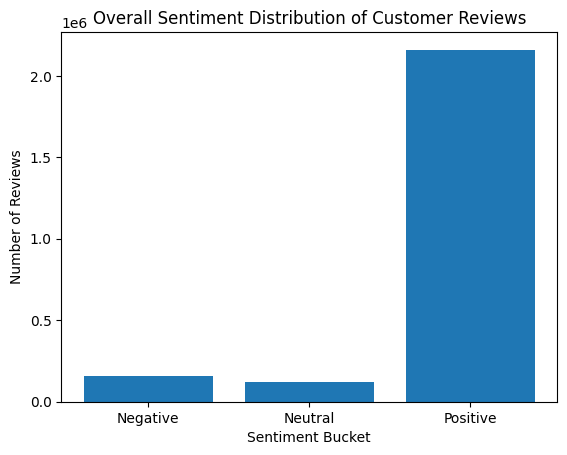

In [8]:
## STEP 2A — Generate the Graph

import matplotlib.pyplot as plt

# Aggregate sentiment counts
sentiment_counts = (
    reviews_analytics.group_by("sentiment_bucket").count().sort("sentiment_bucket")
)

# Convert to Python lists
labels = sentiment_counts["sentiment_bucket"].to_list()
counts = sentiment_counts["count"].to_list()

# Plot
plt.figure()
plt.bar(labels, counts)
plt.title("Overall Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment Bucket")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
## STEP 3A — Prepare Aggregated Data

# Aggregate counts by topic and sentiment
topic_sentiment_counts = (
    reviews_analytics.group_by(["review_topic", "sentiment_bucket"])
    .count()
    .sort(["review_topic", "sentiment_bucket"])
)

topic_sentiment_counts

C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\810620474.py:4: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


review_topic,sentiment_bucket,count
str,str,u32
"""ComputerGame""","""Negative""",12619
"""ComputerGame""","""Neutral""",4500
"""ComputerGame""","""Positive""",32881
"""Course""","""Negative""",38255
"""Course""","""Neutral""",53363
…,…,…
"""Music""","""Neutral""",4430
"""Music""","""Positive""",70774
"""Products""","""Negative""",23745


C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\2334500431.py:8: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  pivot_df = topic_sentiment_counts.pivot(


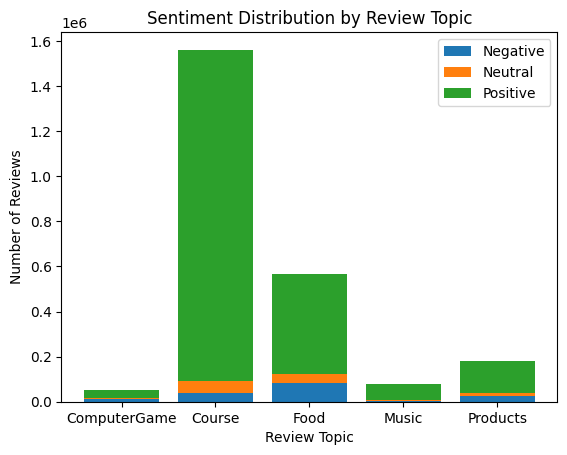

In [10]:
## STEP 3B — Create Stacked Bar Chart


import matplotlib.pyplot as plt
import numpy as np

# Pivot data for plotting
pivot_df = topic_sentiment_counts.pivot(
    values="count", index="review_topic", columns="sentiment_bucket"
).fill_null(0)

# Extract values
topics = pivot_df["review_topic"].to_list()
negative = pivot_df["Negative"].to_list()
neutral = pivot_df["Neutral"].to_list()
positive = pivot_df["Positive"].to_list()

# Plot
plt.figure()
plt.bar(topics, negative, label="Negative")
plt.bar(topics, neutral, bottom=negative, label="Neutral")
plt.bar(
    topics,
    positive,
    bottom=[n + m for n, m in zip(negative, neutral)],
    label="Positive",
)

plt.title("Sentiment Distribution by Review Topic")
plt.xlabel("Review Topic")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

In [11]:
## STEP 4A — Compute Negative Share by Topic


# Total reviews per topic
topic_totals = (
    reviews_analytics
    .group_by("review_topic")
    .count()
    .rename({"count": "total_reviews"})
)

# Negative reviews per topic
topic_negative = (
    reviews_analytics
    .filter(pl.col("sentiment_bucket") == "Negative")
    .group_by("review_topic")
    .count()
    .rename({"count": "negative_reviews"})
)

# Join and compute negative share
topic_risk = (
    topic_totals
    .join(topic_negative, on="review_topic", how="left")
    .fill_null(0)
    .with_columns(
        (pl.col("negative_reviews") / pl.col("total_reviews"))
        .alias("negative_share")
    )
    .sort("negative_share", descending=True)
)

topic_risk

C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\500480980.py:8: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()
C:\Users\Dell\AppData\Local\Temp\ipykernel_21920\500480980.py:17: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


review_topic,total_reviews,negative_reviews,negative_share
str,u32,u32,f64
"""ComputerGame""",50000,12619,0.25238
"""Food""",568454,82037,0.144316
"""Products""",180385,23745,0.131635
"""Music""",78162,2958,0.037844
"""Course""",1561576,38255,0.024498


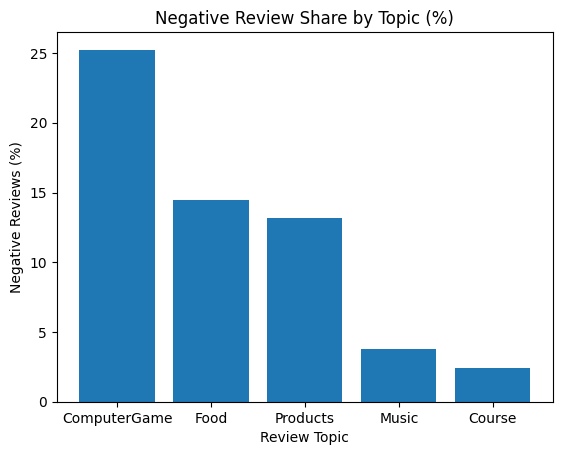

In [12]:
## STEP 4B — Plot Negative Share (%) Bar Chart


import matplotlib.pyplot as plt

topics = topic_risk["review_topic"].to_list()
neg_share_pct = (topic_risk["negative_share"] * 100).to_list()

plt.figure()
plt.bar(topics, neg_share_pct)
plt.title("Negative Review Share by Topic (%)")
plt.xlabel("Review Topic")
plt.ylabel("Negative Reviews (%)")
plt.show()